***Thad Hoskins***

Mini-project 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix, precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix, mean_squared_error

***Question 4***

<p>Find your own dataset suitable for classification with at least three input variables and 200 cases: You will build a decision tree classifier and a random forest classifier. Find some interesting dataset instead of the popular iris data, etc. Feel free to use a dataset suitable for classification from this link provided below or some other source of your choice: https://vincentarelbundock.github.io/Rdatasets/articles/data.html
<p>Address the following and include code/output snippets from b) to f). Include the response under each sub question.</p>

a)	State your research question: Are decision trees and random forest good models for predicting whether youths rode with a drinking driver in past 30 days (risky behavior) or not.

For this analysis, we will use the gender of the youth, grade level, age, whether or not the youth smokes, and whether or not they have a driver's license.

This dataset is derived from the 2007 Youth Risk Behavior Surveillance System (YRBSS), which is an annual survey conducted by the Centers for Disease Control and Prevention (CDC) to monitor the prevalence of health-risk youth behaviors. This dataset focuses on whether or not youths have recently (in past 30 days) ridden with a drunk driver.

https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/YouthRisk.html

Dataset: https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/YouthRisk.csv

In [2]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/YouthRisk.csv")
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,ride.alc.driver,female,grade,age4,smoke,DriverLicense
0,1,1.0,10.0,15.0,1.0,0.0
1,1,1.0,10.0,18.0,1.0,1.0
2,1,NaN,NaN,NaN,NaN,NaN
3,0,0.0,11.0,17.0,0.0,1.0
4,0,0.0,11.0,17.0,0.0,1.0
...,...,...,...,...,...,...
13382,0,NaN,9.0,15.0,0.0,0.0
13383,0,NaN,9.0,15.0,0.0,0.0
13384,0,NaN,9.0,15.0,0.0,0.0
13385,0,NaN,9.0,15.0,0.0,0.0


b)	Data pre-processing (to the extent deemed necessary)

In [3]:
numeric_vars = data.columns[data.dtypes != "object"]
categorical_vars = data.columns[data.dtypes == "object"]

In [4]:
numeric_vars

Index(['ride.alc.driver', 'female', 'grade', 'age4', 'smoke', 'DriverLicense'], dtype='object')

In [5]:
categorical_vars

Index([], dtype='object')

In [6]:
data[numeric_vars].isnull().sum().sort_values(ascending=False)

female             755
smoke              388
grade               67
age4                54
DriverLicense       54
ride.alc.driver      0
dtype: int64

In [7]:
# Drop rows with missing data
data.dropna(axis=0, how='any', inplace=True)
data

,ride.alc.driver,female,grade,age4,smoke,DriverLicense
0,1,1.0,10.0,15.0,1.0,0.0
1,1,1.0,10.0,18.0,1.0,1.0
3,0,0.0,11.0,17.0,0.0,1.0
4,0,0.0,11.0,17.0,0.0,1.0
5,0,0.0,11.0,17.0,1.0,1.0
...,...,...,...,...,...,...
13173,0,0.0,9.0,15.0,0.0,0.0
13174,1,0.0,9.0,15.0,0.0,0.0
13176,0,0.0,9.0,15.0,0.0,0.0
13177,0,0.0,9.0,15.0,0.0,0.0


In [8]:
data.grade.unique()

array([10., 11.,  9., 12.])

In [9]:
data.smoke.unique()

array([1., 0.])

In [10]:
data.DriverLicense.unique()

array([0., 1.])

In [11]:
# Change gender, smoker, driver's license to integers. This is an opinion, but I think the data is cleaner.
data["female"] = data["female"].astype(int)
data["smoke"] = data["smoke"].astype(int)
data["DriverLicense"] = data["DriverLicense"].astype(int)

In [12]:
# Normalize the grade and age fields to be in line with the other data being 0 or 1.
cols = ["grade", "age4"]
for col in cols:
    X = np.array(data[col]).reshape(-1, 1)
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    data[col] = X_scaled
data

,ride.alc.driver,female,grade,age4,smoke,DriverLicense
0,1,1,0.333333,0.25,1,0
1,1,1,0.333333,1.00,1,1
3,0,0,0.666667,0.75,0,1
4,0,0,0.666667,0.75,0,1
5,0,0,0.666667,0.75,1,1
...,...,...,...,...,...,...
13173,0,0,0.000000,0.25,0,0
13174,1,0,0.000000,0.25,0,0
13176,0,0,0.000000,0.25,0,0
13177,0,0,0.000000,0.25,0,0


c) Data splitting 

In [13]:
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(data.drop(["ride.alc.driver"], axis=1),
                                                    data["ride.alc.driver"],
                                                    test_size=0.30,
                                                    random_state=42)

In [14]:
y_4_test.shape

(3685,)

d) Model construction (a decision tree and a random forest)

In [15]:
dt_4 = DecisionTreeClassifier(random_state=42)
dt_4.fit(X_4_train, y_4_train)

DecisionTreeClassifier(random_state=42)

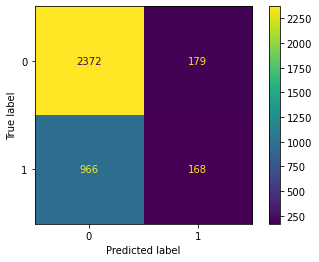

In [16]:
plot_confusion_matrix(dt_4, X_4_test, y_4_test);

In [17]:
rf_4 = RandomForestClassifier(random_state=42)
rf_4.fit(X_4_train, y_4_train)

RandomForestClassifier(random_state=42)

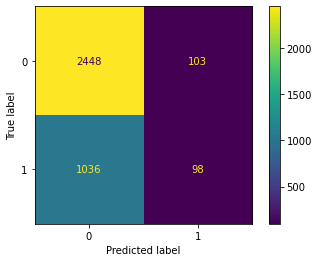

In [18]:
plot_confusion_matrix(rf_4, X_4_test, y_4_test);

e) Hyperparameter tuning (for each model, tune the hyperparameter that is important to you and use any of the methods for hyperparameter tuning learned in class such as cross validation with for loop, gridsearch cross validation, etc. You could tune more than a single parameter for each model if you want). 

In [19]:
# Decision Tree
dt_4.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [20]:
dt_4.tree_.max_depth

9

In [21]:
params = {'max_depth':range(1,dt_4.tree_.max_depth), 'max_features': [1,2,3,4,5]}
dt_gs_4 = GridSearchCV(dt_4, params, cv=8, scoring='accuracy', return_train_score=True)

In [22]:
dt_gs_4.fit(X_4_test, y_4_test)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 9),
                         'max_features': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='accuracy')

In [23]:
dt_gs_4.best_params_

{'max_depth': 4, 'max_features': 5}

In [24]:
# Random Forest
rf_4.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [25]:
rf_params = [{'n_estimators':[3,10,30,50,60,75,100], 'max_features':[1,3,5]},
             {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[1,3,5]}]
rf_gs_4 = GridSearchCV(rf_4, rf_params, cv=8, scoring='accuracy', return_train_score=True)

In [26]:
rf_gs_4.fit(X_4_test, y_4_test)
rf_gs_4.best_params_

{'max_features': 3, 'n_estimators': 3}

f)	Use the best or optimal parameter values to build a model, then compute the accuracy score for the decision tree and for the random forest). 

In [27]:
dt_estimator = dt_gs_4.best_estimator_
dt_estimator

DecisionTreeClassifier(max_depth=4, max_features=5, random_state=42)

In [28]:
rf_estimator = rf_gs_4.best_estimator_
rf_estimator

RandomForestClassifier(max_features=3, n_estimators=3, random_state=42)

In [29]:
# Decision Tree
dt_estimator.fit(X_4_train, y_4_train)
y_4_train_pred = dt_estimator.predict(X_4_train)
y_4_test_pred = dt_estimator.predict(X_4_test)

In [30]:
dt_acc_train = accuracy_score(y_4_train, y_4_train_pred)
print(f"Decision Tree accuracy, Training: {round(dt_acc_train, 4)}")

Decision Tree accuracy, Training: 0.6863


In [31]:
dt_acc_test = accuracy_score(y_4_test, y_4_test_pred)
print(f"Decision Tree accuracy, Test: {round(dt_acc_test, 4)}")

Decision Tree accuracy, Test: 0.6909


In [32]:
# Random Forest
rf_estimator.fit(X_4_train, y_4_train)
y_4_train_pred = rf_estimator.predict(X_4_train)
y_4_test_pred = rf_estimator.predict(X_4_test)

In [33]:
rf_accuracy_train = accuracy_score(y_4_train, y_4_train_pred)
print(f"Random forest accuracy, Training: {round(rf_accuracy_train, 4)}")

Random forest accuracy, Training: 0.6855


In [34]:
rf_accuracy_test = accuracy_score(y_4_test, y_4_test_pred)
print(f"Random forest accuracy, Test: {round(rf_accuracy_test, 4)}")

Random forest accuracy, Test: 0.6925


g)	Discuss about overfitting for both models and, also discuss which model is better for classification for your dataset and why? 

<p>The models are not overfit. The test accuracy is within normal deviation for the training.</p>
<p>As for which to use, the accuracy was not great for either. The Decision Tree accuracy for training was slightly higher, which Random Forest Test accuracy is better. For that "tie", I will go with the test Accuracy of Random Forest. But, the results are nearly the same, so that is a coin toss. I could just as easily say that Decision Tree difference between training and test is closer than Random Forest. Again, coin toss.</p>
<p>More generally, for Random Forest, 100% or other high values for accuracy on the training data is not a huge cause for concern. There is also a point of performance gain or loss. For Random Forest, it may seem like a better idea to increase the depth significantly, since this will not cause overfitting. But it may simply be a waste of time, processor use, and power. In the world of Data Science, the savings of computation time may be well worth scaling back to a good depth, rather that perfect.</p>
<p>For Decision Trees and overfitting, we need to keep the tree pruned. To do so, we can use hyperparameter tuning with cross validation to make sure we are utilizing the tree efficiently. Or we may produce an entire tree and trim. The first is generally the best approach. While it may be computationally expensive to tune hyperparameters and cross validate, this is a good middle ground to ensure the model is not overfitted and to make sure some analyst does not have to sit with a computer for days on end waiting for the server to finish.</p>